In [5]:
%matplotlib inline
import os
import pandas as pd
import datetime as dt
import re
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [6]:
# set plot style
plt.style.use('ggplot')

In [7]:
# import data
pp_data = pd.read_csv("../data/pp_data_2018_processed.csv")

In [8]:
# create directory to hold plots
os.mkdir("plots")

In [9]:
pp_data.shape

(20065, 12)

In [10]:
pp_data.columns

Index(['age', 'sex', 'height_in', 'start_weight', 'end_weight', 'weight_diff',
       'score', 'num_comments', 'month', 'dayofweek', 'NSFW', 'num_posts'],
      dtype='object')

### Sex analysis

In [11]:
# determine the number of males and females
sex_counts = pp_data["sex"].value_counts()
sex_counts

1    10432
0     9633
Name: sex, dtype: int64

In [12]:
# calculate the percentage of males and females
males = sex_counts[0]/pp_data["sex"].count()
females = sex_counts[1]/pp_data["sex"].count()
males, females

(0.4800897084475455, 0.5199102915524545)

In [13]:
# create dictionaries holding the percentage of males and females in r/progresspics population, general Reddit 
# population and US adult population
# numbers in the US_sex_dict and reddit_sex_dict came from:  https://www.techjunkie.com/demographics-reddit/
US_sex_dict = {"male":  0.49, "female": 0.51}
reddit_sex_dict = {"male":  0.67, "female": 0.33}
pp_sex_dict = {"male":  males, "female": females}

[Text(0, 0.5, 'frequency'),
 Text(0.5, 1.0, 'Frequency of males and females in various populations')]

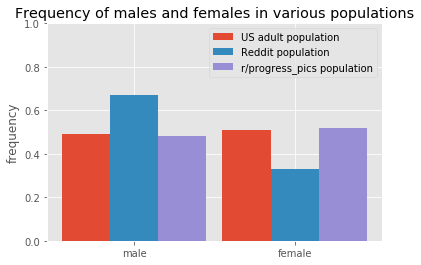

In [14]:
# plot frequency of males and females in r/progesspics population, general Reddit population and the US adult 
# population
ind = np.arange(2)
width = 0.30

fig, ax = plt.subplots()
ax.bar(ind, list(US_sex_dict.values()), width, align="center", label = "US adult population")
ax.bar(ind + width, list(reddit_sex_dict.values()), width, align="center", label = "Reddit population")
ax.bar(ind + 2*width, list(pp_sex_dict.values()), width, align="center", label = "r/progress_pics population")
ax.set_xticks(ind + width)
ax.set_xticklabels(list(US_sex_dict.keys()))
ax.set_ylim(0, 1)
ax.legend()
ax.set(title="Frequency of males and females in various populations", ylabel="frequency")

In [15]:
fig.savefig("plots/pp_sex_compare.png")

### Age analysis

In [16]:
# create male-only and female-only dfs
pp_males = pp_data[pp_data["sex"] == 0]
pp_females = pp_data[pp_data["sex"] == 1]

In [17]:
# determine mean male and mean female ages
print("mean male age", pp_males["age"].mean())
print("mean female age", pp_females["age"].mean())

mean male age 26.18249766427904
mean female age 26.104390337423315


In [18]:
# calculate percentage of total users in the their 20s. 
pp_data[(pp_data["age"] >= 20) & (pp_data["age"] < 30)].shape[0]/pp_data.shape[0]

0.6681784201345626

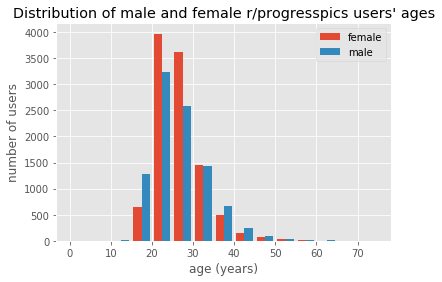

In [19]:
# plot male and female age distributions
fig, ax = plt.subplots()
ax.hist([pp_females["age"], pp_males["age"],], label=["female", "male"], bins=np.arange(0, 80, 5))
ax.set(xlabel="age (years)", ylabel="number of users", title="Distribution of male and female r/progresspics users' ages")
ax.legend()

In [20]:
fig.savefig("plots/pp_m_f_age_comparision.png")

In [21]:
# calculate the proportions of users in specified age ranges
pp_adults = pp_data[pp_data["age"] >=18]
adults18_29 = pp_adults[(pp_adults["age"] >=18)&(pp_adults["age"] <=29)].shape[0]/pp_adults.shape[0]
adults30_49 = pp_adults[(pp_adults["age"] >=30)&(pp_adults["age"] <=49)].shape[0]/pp_adults.shape[0]
adults50_64 = pp_adults[(pp_adults["age"] >=50)&(pp_adults["age"] <=64)].shape[0]/pp_adults.shape[0]
adults65 = pp_adults[(pp_adults["age"] >=65)].shape[0]/pp_adults.shape[0]

In [22]:
# create dictionaries to hold the proportions of r/progresspics users, general Reddit users, and US adult population
# in various age ranges
# adult demographic info from 2016:  https://www.techjunkie.com/demographics-reddit/
US_age_dict = {"18-29":  0.22, "30-49": 0.34, "50-64": 0.25, "65+": 0.19}
reddit_age_dict = {"18-29":  0.64, "30-49": 0.29, "50-64": 0.06, "65+": 0.01}
pp_age_dict = {"18-29":  adults18_29, "30-49": adults30_49, "50-64": adults50_64, "65+": adults65}

[Text(0, 0.5, 'frequency'),
 Text(0.5, 0, 'age range (years)'),
 Text(0.5, 1.0, 'Frequency of adults in various population age ranges')]

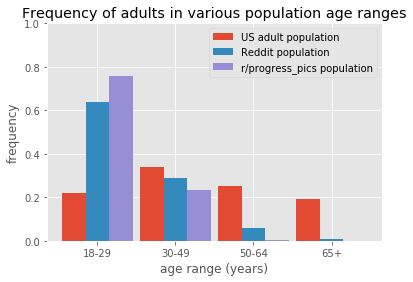

In [23]:
# plot the frequency of adults in various population age ranges
ind = np.arange(4)
width = 0.30

fig, ax = plt.subplots()
ax.bar(ind, list(US_age_dict.values()), width, align="center", label = "US adult population")
ax.bar(ind + width, list(reddit_age_dict.values()), width, align="center", label = "Reddit population")
ax.bar(ind + 2*width, list(pp_age_dict.values()), width, align="center", label = "r/progress_pics population")
ax.set_xticks(ind + width)
ax.set_xticklabels(list(US_age_dict.keys()))
ax.set_ylim(0, 1)
ax.legend()
ax.set(title="Frequency of adults in various population age ranges", xlabel="age range (years)", ylabel="frequency")

In [24]:
fig.savefig("plots/pp_age_comparison.png")

### Height analysis

In [25]:
# calcuate mean male and mean female heights
print("mean male height:", pp_males["height_in"].mean())
print("mean female height:", pp_females["height_in"].mean())

mean male height: 70.94408452606145
mean female height: 65.2542913896645


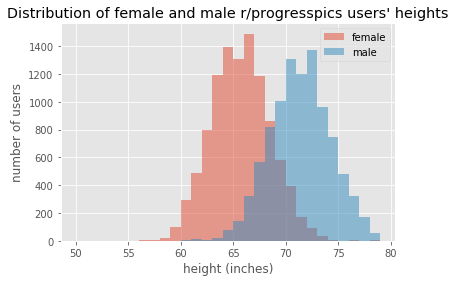

In [26]:
# plot distribution of male and female heights 
fig, ax = plt.subplots()
ax.hist(pp_females["height_in"], label=["female"], bins=np.arange(50, 80, 1), alpha=0.5)
ax.hist(pp_males["height_in"], label=["male"], bins=np.arange(50, 80, 1), alpha=0.5)
ax.set(xlabel="height (inches)", ylabel="number of users", title="Distribution of female and male r/progresspics users' heights")
ax.legend()

In [27]:
fig.savefig("plots/pp_height_range.png")

### Starting and ending weights

In [28]:
# calculate the mean male and mean female starting weights 
print("mean male starting weight:", pp_males["start_weight"].mean())
print("mean female starting weight:", pp_females["start_weight"].mean())

mean male starting weight: 243.19610509706223
mean female starting weight: 206.70239650498468


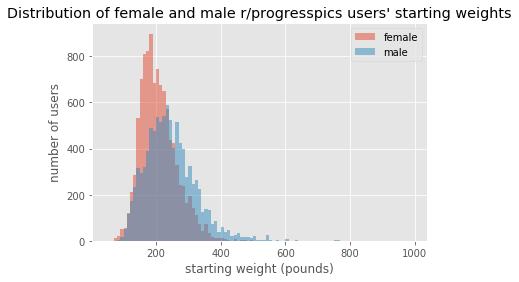

In [29]:
# plot the male and female starting weight distribution
fig, ax = plt.subplots()
ax.hist(pp_females["start_weight"], label=["female"], bins = np.arange(50, 1000, 10), alpha=0.5)
ax.hist(pp_males["start_weight"], label=["male"], bins=np.arange(50, 1000, 10), alpha=0.5)
ax.set(xlabel="starting weight (pounds)", ylabel="number of users", title="Distribution of female and male r/progresspics users' starting weights")
ax.legend()

In [30]:
fig.savefig("plots/pp_starting_weight.png")

In [31]:
# calculate the mean male and mean female ending weights 
print("mean male ending weight:", pp_males["end_weight"].mean())
print("mean female ending weight:", pp_females["end_weight"].mean())

mean male ending weight: 195.21604517595765
mean female ending weight: 163.3649822910276


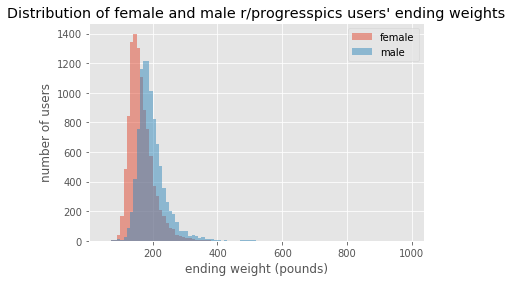

In [32]:
# plot the male and female ending weight distributions
fig, ax = plt.subplots()
ax.hist(pp_females["end_weight"], label=["female"], bins = np.arange(50, 1000, 10), alpha=0.5)
ax.hist(pp_males["end_weight"], label=["male"], bins=np.arange(50, 1000, 10), alpha=0.5)
ax.set(xlabel="ending weight (pounds)", ylabel="number of users", title="Distribution of female and male r/progresspics users' ending weights")
ax.legend()

In [33]:
fig.savefig("plots/pp_ending_weight.png")

### Analysis of weight loss vs weight gain

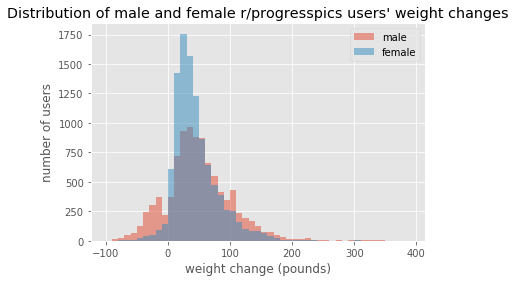

In [34]:
# plot the distributions of weight change for males and females 
fig, ax = plt.subplots()
ax.hist(pp_males["weight_diff"], label=["male"], bins = np.arange(-100, 400, 10), alpha=0.5)
ax.hist(pp_females["weight_diff"], label=["female"], bins=np.arange(-100, 400, 10), alpha=0.5)
ax.set(xlabel="weight change (pounds)", ylabel="number of users", title="Distribution of male and female r/progresspics users' weight changes")
ax.legend()

In [35]:
# calcuate how many users lost weight, gained weight, or stayed the same
total_entries = pp_data['weight_diff'].count()

print("How many lost weight?")
print(pp_data[pp_data["weight_diff"] > 0]["weight_diff"].count())
print(pp_data[pp_data["weight_diff"] > 0]["weight_diff"].count()/total_entries)
print("How many gained weight?")
print(pp_data[pp_data["weight_diff"] < 0]["weight_diff"].count())
print(pp_data[pp_data["weight_diff"] < 0]["weight_diff"].count()/total_entries)
print("How many stayed the same?")
print(pp_data[pp_data["weight_diff"] == 0]["weight_diff"].count())  
print(pp_data[pp_data["weight_diff"] == 0]["weight_diff"].count()/total_entries)

How many lost weight?
18083
0.9012210316471467
How many gained weight?
1778
0.08861201096436581
How many stayed the same?
204
0.010166957388487417


In [36]:
# create dfs that contain only users that lost weight or only users that gained weight
pp_lost = pp_data[pp_data["weight_diff"] > 0]
pp_gain = pp_data[pp_data["weight_diff"] < 0]

In [37]:
# create dfs that contain only males who lost weight, only females who lost weight, only males who gained weight and 
# only females who gained weight
pp_male_lost = pp_lost[pp_lost['sex'] == 0]
pp_female_lost = pp_lost[pp_lost['sex'] == 1]
pp_male_gain = pp_gain[pp_gain['sex'] == 0]
pp_female_gain = pp_gain[pp_gain['sex'] == 1]

In [38]:
# calculate the mean amount of male weight loss, male weight gain, female weight loss and female weight gain. 
print("mean male weight loss:", pp_male_lost['weight_diff'].mean())
print("mean female weight loss:", pp_female_lost['weight_diff'].mean())
print("mean male weight gain:", pp_male_gain['weight_diff'].mean())
print("mean female weight gain:", pp_female_gain['weight_diff'].mean())

mean male weight loss: 61.91600509247843
mean female weight loss: 46.043969613957685
mean male weight gain: -28.191167311220887
mean female weight gain: -19.669262825484765


In [39]:
# calculate the max amount of male weight loss and female weight loss
print("Max male weight loss:", pp_male_lost["weight_diff"].max())
print("Max female weight loss:", pp_female_lost["weight_diff"].max())

Max male weight loss: 500.0
Max female weight loss: 316.0


In [40]:
# change numbers in the weight_diff columns in the weight gained dfs from negative to positive
pp_male_gain.loc[:, "weight_diff"] = pp_male_gain.loc[:, "weight_diff"] * -1
pp_female_gain.loc[:, "weight_diff"] = pp_female_gain.loc[:, "weight_diff"] * -1

/Users/ajwright/anaconda3/envs/my_conda/lib/python3.7/site-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


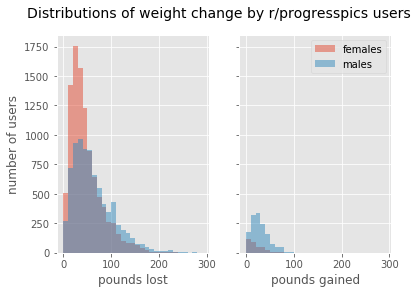

In [41]:
# create 2 plots, one showing the distribution of weight change by male and female weight gainers and one showing
# the distribution of weight loss by male and female weight losers. 
fig, [ax1, ax2] = plt.subplots(1, 2, sharey=True)
ax1.hist(pp_female_lost["weight_diff"], bins = np.arange(0, 300, 10), label="females", alpha=0.5)
ax1.hist(pp_male_lost["weight_diff"], bins = np.arange(0, 300, 10), label="males", alpha=0.5)
ax1.set(xlabel="pounds lost", ylabel="number of users")
ax2.hist(pp_female_gain["weight_diff"], bins = np.arange(0, 300, 10), label='females', alpha=0.5)
ax2.hist(pp_male_gain["weight_diff"], bins = np.arange(0, 300, 10), label='males', alpha=0.5)
ax2.set(xlabel="pounds gained")
fig.suptitle("Distributions of weight change by r/progresspics users", fontsize=14)
ax2.legend()

In [42]:
fig.savefig("plots/pp_histogram_weight_diff.png")

### Duration analysis

In [43]:
# import dataset to analyze 
pp_duration = pd.read_csv("../data/pp_duration_2018_processed.csv")

In [44]:
pp_duration.columns

Index(['age', 'sex', 'height_in', 'start_weight', 'end_weight', 'weight_diff',
       'score', 'num_comments', 'month', 'dayofweek', 'NSFW', 'num_posts',
       'period_months', 'rate', 'norm_rate'],
      dtype='object')

In [45]:
pp_duration.shape

(12517, 15)

In [46]:
# create dfs that contain only males, only females, only those that lost weight and only those that gained weight. 
dur_male = pp_duration[pp_duration['sex'] == 0]
dur_female = pp_duration[pp_duration['sex'] == 1]
dur_loss = pp_duration[pp_duration["weight_diff"] > 0]
dur_gain = pp_duration[pp_duration["weight_diff"] < 0]

In [47]:
# create dfs that contain only males who lost weight, only females who lost weight, only males who gained weight and 
# only females who gained weight
dur_male_loss = dur_loss[dur_loss['sex'] == 0]
dur_male_gain = dur_gain[dur_gain['sex'] == 0]
dur_female_loss = dur_loss[dur_loss['sex'] == 1]
dur_female_gain = dur_gain[dur_gain['sex'] == 1]

In [48]:
# create df that contains only people who lost weight over a period of 6 or less years
dur_loss_lt72 = dur_loss[dur_loss["period_months"]<=72]

In [49]:
# determine the longest period of time spent losing weight
print("Longest duration of weight loss:", dur_loss["period_months"].max())

Longest duration of weight loss: 208.0


In [50]:
# calculate the number and percentage of users who lost weight in 6 years or less and in 12 months or less. 
years_lt6 = dur_loss[dur_loss['period_months'] <= 72].shape[0]
per_years_lt6 = round(years_lt6/dur_loss.shape[0] * 100, 1)
years_lt1 = dur_loss[dur_loss['period_months'] <= 12].shape[0]
per_years_lt1 = round(years_lt1/dur_loss.shape[0] *100, 1)
print("users whose weight loss duration was <= 6 years", years_lt6, per_years_lt6)
print("users whose weight loss duration was <= 1 years", years_lt1, per_years_lt1)

users whose weight loss duration was <= 6 years 11007 98.4
users whose weight loss duration was <= 1 years 7545 67.4


[Text(0, 0.5, 'number of users'),
 Text(0.5, 0, 'months'),
 Text(0.5, 1.0, 'Duration of the weight loss')]

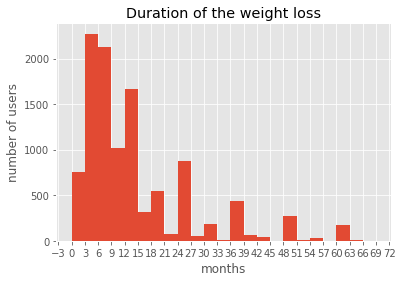

In [51]:
# plot the distribution of weight loss time periods 
fig, ax = plt.subplots()
ax.hist(dur_loss_lt72["period_months"], bins = np.arange(0, 70, 3))
ax.xaxis.set_major_locator(plt.MultipleLocator(3))
ax.set(xlabel="months", ylabel="number of users", title="Duration of the weight loss")

In [52]:
fig.savefig("plots/pp_weight_loss_duration.png")

### Rate of weight loss

In [53]:
# calculate mean rate of weight loss and mean normalized rate of weight loss for all users, males and females
print("Overall mean loss rate and normalized rate:", dur_loss["rate"].mean(), dur_loss["norm_rate"].mean())
print("Male mean loss rate and normalized rate::", dur_male_loss["rate"].mean(), dur_male_loss["norm_rate"].mean())
print("Female mean loss rate and normalized rate::", dur_female_loss["rate"].mean(), dur_female_loss["norm_rate"].mean())

Overall mean loss rate and normalized rate: 5.838903234923698 0.024719884166686298
Male mean loss rate and normalized rate:: 6.645183327016068 0.025193477466827513
Female mean loss rate and normalized rate:: 5.131378925923176 0.024304298099616078


[Text(0, 0.5, 'number of users'),
 Text(0.5, 0, 'weight loss rates (pounds/month)'),
 Text(0.5, 1.0, "Distribution of female and male r/progresspics users' weight loss rates")]

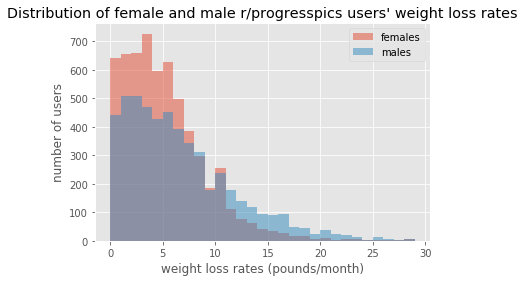

In [54]:
# plot distibution of male and female weight loss rates 
fig, ax = plt.subplots(1, 1)
ax.hist(dur_female_loss["rate"], bins = np.arange(0, 30, 1), label='females', alpha = 0.5)
ax.hist(dur_male_loss["rate"], bins = np.arange(0, 30, 1), label='males', alpha = 0.5)
ax.legend()
ax.set(title="Distribution of female and male r/progresspics users' weight loss rates", xlabel="weight loss rates (pounds/month)", 
      ylabel="number of users")

In [55]:
fig.savefig("plots/pp_raw_weight_loss_rates.png")

Text(0.05, 0.5, 'number of users')

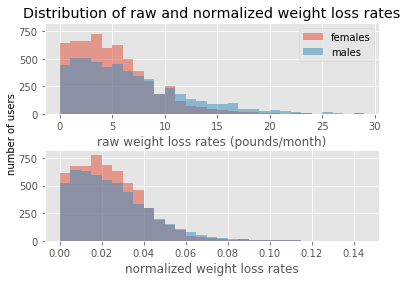

In [56]:
# plot distribution of male and female normalized weight loss rates  
fig, [ax1, ax2] = plt.subplots(2, 1, sharey=True)
ax1.hist(dur_female_loss["rate"], bins = np.arange(0, 30, 1), label='females', alpha = 0.5)
ax1.hist(dur_male_loss["rate"], bins = np.arange(0, 30, 1), label='males', alpha = 0.5)
#ax1.xaxis.set_major_locator(plt.MultipleLocator(3))
ax1.legend()
ax1.set(title="Distribution of raw and normalized weight loss rates", xlabel="raw weight loss rates (pounds/month)")
ax2.hist(dur_female_loss["norm_rate"], bins = np.arange(0, 0.15, 0.005), label='females', alpha = 0.5)
ax2.hist(dur_male_loss["norm_rate"], bins = np.arange(0, 0.15, 0.005), label='males', alpha = 0.5)
#ax2.xaxis.set_major_locator(plt.MultipleLocator(4))
ax2.set(xlabel="normalized weight loss rates")
fig.subplots_adjust(hspace = 0.4)
fig.text(0.05, 0.5, 'number of users', ha='center', va='center', rotation='vertical')